# Intro to NumPy

# Contents
- [Creating arrays](#Creating-arrays)
- [Understanding your array](#Understanding-your-array)
- [Accessing and changing elements of your array](#Accessing-and-changing-elements-of-your-array)
- [Applying functions](#Applying-functions)
- [Quiz Answers](#Answers-to-Quiz-Questions)
- [Challenge Answers](#Answers-to-challenges) 

## Why NumPy?

You will occassionaly interact with NumPy directly in typical day to day tasks as a data scientist. However, it is the underlying fabric of many higher level libraries which are the bread and butter of typical workflows (e.g. Pandas). To work with those libraries it can help to understand NumPy. Furthermore, NumPy makes use of underlying code optimisation techniques to make linear algebra (and elementwise operations in general) 10-100x faster as long as you properly utilise the library (write so called 'vectorized' code). Lastly, you can rely on the underlying implementation to be correct instead of cooking up your own.

## Creating arrays

There are many different ways to create arrays (matrices) in NumPy, here are some examples of the most common. Suppose we want to represent the following matrix for computation:
$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix}
$$
In order to use this matrix in NumPy we write the entries manually out. It is important to be clear on which dimension represents what, the convention of rows first then columns is the most common way of representing 2D matrices in NumPy, i.e. you have a list of rows, so the first index passed chooses a row.

In [4]:
import numpy as np    

manual_arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
manual_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Let us now instead begin first with a NumPy range, and the rearrange/reshape it into a 3-by-3 matrix as above. Note that ranges in NumPy (as well as Python) are right exclusive (so `np.arange(1,10)` includes 1 but excludes 10). 

In [5]:
np_range = np.arange(1,10)
np_range

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

To reshape the array we have to set the size of each dimension to be reshaped to as a tuple. Here we ask to change the shape of the 1D 9 element range to a 2D 3x3 array. Instead of fixing both dimensions in advance, we can only set the first one and use -1 to let NumPy figure out the second dimension to fit the given data.

In [6]:
reshaped_arr = np_range.reshape((3,-1))
reshaped_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

When creating arrays from other arrays, for instance by transposing, we can explicitly tell NumPy to create a copy of the array to prevent altering the first one.

In [7]:
transpose_arr = manual_arr.T.copy()
transpose_arr

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Try now to remove `copy()` after the transposing, change one entry of `transpose_arr` and print out the output of `manual_arr` to convince yourself that the latter was changed as well. This is because transposing still refers internally to the same data as we will discuss in the next section. Once you learn how to create matrices in R you should check if the same applies to transposing matrices in R.

#### Assigning NumPy arrays gives a 'window'

Assignment of existing NumPy arrays to variables is done 'by reference'. This is a technical way of saying that instead of creating a new array and copying the data into it, we get a 'window' into the original array on the right hand side of the assigment. To avoid this behaviour make use of `.copy()` to explicitely tell Python to make a copy with no ties to the original.

An example of mistakes that can be caused by such carelessness will be demonstrated in the following section on accessing the array.

>**Important: If you change a 'window into' (or reference to) an array you change the underlying array. This can cause confusing semantic errors that are hard to catch and debug, as often it does not cause syntactic or runtime errors - you may never know that you even made a mistake.**


Suppose we create separately vectors and then combine them as rows into one array.

In [8]:
row_1 = np.array([1,2,3])
row_2 = np.array([4,5,6])
row_3 = np.array([7,8,9])
# we use `np.stack()` to create 1 2D array of shape (3,3)
concatenated_arr = np.stack([row_1, row_2, row_3])
concatenated_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Another way of combining the vectors would be to use `np.concatenate`, which will maintain the dimensionality of the arrays handed to it, essentially 'extending' them. Here it will join 3 separate 1D arrays into 1 new 1D array. 

In [9]:
concatenated2_arr = np.concatenate([row_1, row_2, row_3])
concatenated2_arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Creating new arrays from old ones is often inefficient You should think if you need to do it. If the dimension shapes required are known it is better to preallocate memory, e.g. by creating a zero-filled array.

In [10]:
preallocated_arr = np.zeros((3,3))
preallocated_arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Quiz A:

1. How do you preallocate memory for a 3 dimensional array with 12 rows, 15 columns and a depth of 5?
- `np.reshape((15,12,5))`
- `np.reshape((11,14,4))`
- `np.zeros((12,15,5))`
- `np.zeros((11,14,4))`
- `np.stack([np.zeros(12,15),np.zeros(12,15),np.zeros(12,15)])`

2. Which of the following code chunks would define the below matrix (where we follow the row-column index order convention)?

$$
\begin{pmatrix}
1 & 3 & 7 \\
11 & 13 & 17 \\
\end{pmatrix}
$$

- `np.array([1,3,7,11,13,17])`
- `np.array([[1,3,7],[11,13,17]])`
- `np.array([[1,11],[3,13],[7,17]])`


3. Which function is used for generating an array based on a range of values?
- `np.zeros()`
- `np.arange()`
- `np.reshape()`

## Understanding your array

The method `.shape` can be very helpful during development to understand how the array changes to track down intermediate steps where things went awry.

In [11]:
print(manual_arr.shape)

(3, 3)


It is also useful to know what data the array expects its elements to be. This can help prevent unexpected behaviour from assigning data of another type, e.g. here we initialised using integers.

In [12]:
manual_arr.dtype

dtype('int64')

When we assign a non-integer value, there is no error and NumPy quietly ignores any non-integer part.

In [13]:
manual_arr[0, 0] = 1.6
manual_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

This can be fixed by 'casting' the array explicitly to a different type. Note that the NumPy version of `astype` copies the underlying array.

In [14]:
float_arr = manual_arr.astype(float)
float_arr[0][0] = 1.6
print(float_arr.dtype)
print(float_arr)
print(manual_arr.dtype)

float64
[[1.6 2.  3. ]
 [4.  5.  6. ]
 [7.  8.  9. ]]
int64


### Quiz B:

1. Which of the following shape tuples represents a 3D array:
- `(3,)`
- `(7,)`
- `(7,8)`
- `(3,8)`
- `(3,3)`
- `(7,8,9)`

2. How do you cast an array's type to a float:
- `manual_arr.astype(float)`
- `float(manual_arr)`

3. What is the expected output of the following code:
`np.stack([row_1,row_2]).shape`
>(`row_1` and `row_2` are defined in stacking examples above)
- `(2,3)`
- `(6,)`
- `(3,2)`

4. What is the expected output of the following code:
`np.array([1., 2.]).dtype`
- `int`
- `dtype('int64')`
- `str`
- `dtype('float64')`
- `float`

## Accessing and changing elements of your array

Accessing NumPy arrays is intuitive if you have experience with accessing native Python objects like lists. It is important to remember that in Python arrays are 0-indexed. This means to get the nth element we must supply an index of (n-1). The only notable difference with NumPy from normal Python indexing is that typically indexing multiple dimensions is done with comma separated indices (`[0, 1]`) instead of supplying each index in a chain (`[0][1]`). Here are some examples:

- supplying a number selects a specific element, i.e. first element `[0]`
- supplying a 'slice' of values selects a sub-array, i.e. from the 1st to 2nd element `[0:2]` 
- when slicing one can choose to take arbitrary steps, i.e. every other element from 1st to 10th `[0:10:2]`
- one can miss out the start or end of a slice to specify the beginning or end of an array, i.e. 3rd to the end `[2:]`; 1st to the 10th `[:10]`; all elements `[:]` 

As another example, suppose we wish to select the first two columns of `manual_arr`. Since we want to access all the rows, we use `:` in the row index, and to extract the first two columns we use `:2` in the column index. Note that 2 here is actually the index for the 3rd column, but slicing is right exclusive.

In [15]:
first_two_cols = manual_arr[:,:2]
first_two_cols

array([[1, 2],
       [4, 5],
       [7, 8]])

We can change elements of the array through specifying which element of the array should take the value.

In [16]:
first_two_cols[0,0] = 20

If you specify a slice on the left of the assignment, the right will be 'broadcast' or copied into all the elements of the range.

In [17]:
first_two_cols[:,1] = 30
first_two_cols

array([[20, 30],
       [ 4, 30],
       [ 7, 30]])

**Important: since we did not use `.copy()`, `manual_arr` changes if we edit `first_two_cols` and vice versa**.

In [18]:
manual_arr

array([[20, 30,  3],
       [ 4, 30,  6],
       [ 7, 30,  9]])

In [19]:
manual_arr[1:,0] = 40
manual_arr

array([[20, 30,  3],
       [40, 30,  6],
       [40, 30,  9]])

In [20]:
first_two_cols

array([[20, 30],
       [40, 30],
       [40, 30]])

### Boolean based access and assignment

An important feature of NumPy is the fact that we want to avoid writing native Python loops as much as possible, preferring to use built-in elementwise NumPy functions. This is what gives NumPy its speed advantage (called 'vectorized' code).

Importantly, if we need conditional updating of values we want to avoid having to write a loop with `if` statements as then we again lose the benefit of using NumPy. In such cases we want to use the `np.where` function to replace conditional selection of arrays. Note that `np.where()` returns a **copy** of the data so does not change the underlying array through changing the result.

Say we want to replace all values in the original matrix larger than 3 with the number 3 (representing some form of saturation). Here we use `reshaped_arr` as we have 'accidentally' changed `manual_arr` by editing a view of it.

In [21]:
condition = (reshaped_arr > 3) # parentheses are not actually necessary here, but improve readability
condition


array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [22]:
saturated_arr = np.where(condition, 3, reshaped_arr)
saturated_arr

array([[1, 2, 3],
       [3, 3, 3],
       [3, 3, 3]])

Editing the returned copy does not impact the underlying arrays.

In [23]:
saturated_arr[0,0] = 10
saturated_arr

array([[10,  2,  3],
       [ 3,  3,  3],
       [ 3,  3,  3]])

In [24]:
reshaped_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

You can negate the condition with `~`.

In [25]:
print(np.where(~condition, 3, reshaped_arr))

[[3 3 3]
 [4 5 6]
 [7 8 9]]


It is also possible to use boolean arrays to access specific elements from a given array. For example, suppose we want to select the first and last row of the array.

In [26]:
chosen = [True, False, True]
reshaped_arr[chosen]

array([[1, 2, 3],
       [7, 8, 9]])

Now suppose we want only the first and last columns.

In [27]:
reshaped_arr[:, chosen]

array([[1, 3],
       [4, 6],
       [7, 9]])

If you believe you need to use boolean indexing, be careful as the indexing can give non-intuitive results. For example, using the saturation condition on the `reshaped_array` does not return a 2D array, but instead a 1D one. 

In [28]:
condition

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [29]:
reshaped_arr[condition]

array([4, 5, 6, 7, 8, 9])

#### Quiz C:

1. Which of the following selects the top-right element of the 3x3 array:
- `manual_arr[1][3]`      
- `manual_arr[2][2]`
- `manual_arr[0][0]`
- `manual_arr[0][3]`
- `manual_arr[0][2]`
- `manual_arr[1][2]`

Suppose you are given the following array, in a variable `arr`:
$$
\begin{pmatrix}
1 & 3 & 7 \\
11 & 13 & 17 \\
19 & 23 & 29
\end{pmatrix}
$$

How would you ...

2. select the row `[11,13,17]`?
- `arr[2, 0]`
- `arr[0, 1]`
- `arr[1, :]`
- `arr[:, 2]`
- `arr[2, :]`

3. change all the numbers less than 10 to 10?
- `arr.reshape((10,10))`
- `np.where( arr > 10, 10, arr)`
- `np.where( arr < 10, 10, arr)`
- `np.if(arr > 10, 10, arr)`
- `np.reshape( arr > 10, 10, arr)`
- `np.reshape( arr < 10, 10, arr)`

4. replace the first column with 3s?
- `arr[0] = 3` 
- `arr[1, :] = [3, 3, 3]`
- `arr[2] = [3, 3, 3]`
- `arr[:, 0] = 3`
- `arr[:, 1] = 3`
- `arr[2, :] = 3`
- `arr[:, 2] = 3`


5. select `[[1, 7], [19, 29]]` ?
- `arr[:, 0]`
- `arr[0, :]`
- `arr[::2, 0]`
- `arr[::2, ::2]`
- `arr[0, ::2]`

### Realistic example

In the following example we will demonstrate how to use NumPy arrays to interact with pixel values in an image. We load an image, and create a copy to be ready for manipulations of the pixel data. The `imread` function in `pyplot` uses NumPy instead of native Python.

In [30]:
import matplotlib.pyplot as plt
image = plt.imread("dog.jpg").copy()
print(image.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'dog.jpg'

The output of the image dimensions corresponds to how image data are represented as triples of data. Each entry corresponds to (x,y,z) with x and y co-ordinates and z being a triple of RGB (red, green, blue) values for colour encoding. 

In [ ]:
plt.imshow(image)

<IPython.core.display.Javascript object>

We can compress the image by keeping only every second pixel.

In [ ]:
compressed_image = image[::2,::2,:]
print(compressed_image.shape)
plt.imshow(compressed_image)

(371, 512, 3)


<IPython.core.display.Javascript object>

Suppose we want to add a black stripe to the image. We use the broadcasting feature of slice assignment to set all the colour channels (final index is `:`) in our chosen stripe to 0, representing black.

In [ ]:
compressed_image[:,:100,:] = 0
plt.imshow(compressed_image)

<IPython.core.display.Javascript object>

Selecting only the blue channel of the *original* image yields a blue image. The `cmap` argument is used to show the blue channel as blue.

In [ ]:
plt.imshow(image[:,:,2], cmap="Blues")

<IPython.core.display.Javascript object>

**Challenge:**
- Why is there a bar in the image if we are looking at the original but we edited the compressed?

- Why is it not a solid bar as in the compressed image (can still see the footprint)?

## Applying functions

Let us create a (3,3) array with entries from 1 to 9 as in above example.

In [ ]:
some_arr = np.arange(1,10).reshape((3,3))
some_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Unary functions

For functions that take a single input, such as `log`, the function is applied in parallel to all elements of the array - 'elementwise'.

In [ ]:
a = np.log(some_arr)
a

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947],
       [1.94591015, 2.07944154, 2.19722458]])

By default functions create copies of arrays to store results in.

In [ ]:
a[0,0] = 100
print(a)
print(some_arr)

[[100.           0.69314718   1.09861229]
 [  1.38629436   1.60943791   1.79175947]
 [  1.94591015   2.07944154   2.19722458]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Binary functions
All operations are elementwise and pairwise. Elementwise multiplication **is not** the same as matrix multiplication. Here it is important to note that the `*` operator is 'overloaded' by NumPy to represent elementwise multiplication of arrays. Thus you will get the NumPy speed-up. 

In [ ]:
some_arr * some_arr.T

array([[ 1,  8, 21],
       [ 8, 25, 48],
       [21, 48, 81]])

### Array comparisons

Comparisons are also elementwise. 

In [ ]:
new_arr = 0.25*some_arr**2
print(new_arr)
res = some_arr > new_arr
print(res)

[[ 0.25  1.    2.25]
 [ 4.    6.25  9.  ]
 [12.25 16.   20.25]]
[[ True  True  True]
 [False False False]
 [False False False]]


If you wish to use the results of array comparisons in `if` statements you will need to condense the results into a single True/False value. As an array of boolean values is ambiguous in truth value, to do so we can use `.any()` or `.all()` to specify the result is `True` if any or all of the array values are `True` respectively.

In [ ]:
print(res.any())
print(res.all())

True
False


If you do not wish to condense the whole array down but rather a specific dimension then you can supply `axis` to the `any()` or `all()` functions. `axis=0` here means that when we use `all()` we apply it by varying the first 'axis' (or index), which corresponds to the rows. `axis=1` means along columns. 

In [ ]:
res.all(axis=0)

array([False, False, False])

This can take some time to wrap your head around, but exposure to examples/re-reading the above will help! 

In [ ]:
res.all(axis=1)

array([ True, False, False])

### Array broadcasting

When supplying a second argument that is not of the same dimension as the first (or vice versa), NumPy will treat the lower dimension array/scalar as being repeated for every element along a given axis. This is called 'broadcasting'. It is quite intuitive what this means for a scalar, e.g. element-wise exponentation.

In [ ]:
np.float_power(some_arr, 0)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Higher dimensional broadcasting is also possible, but be careful when doing so and check intermediate results. For more details check [https://numpy.org/doc/stable/user/basics.broadcasting.html](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [ ]:
some_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
some_arr + [1,2,3]

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

In [ ]:
some_arr + np.array([1,2,3]).reshape((3,1))

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

### Aggregate functions

Here are some examples of aggregate function. We first generate a random (4,3) array of integers between -10 and 10.

In [ ]:
some_arr = np.random.uniform(-10,10, size=(4,3)).astype(int)
some_arr

array([[ 8, -5,  0],
       [ 5, -6, -4],
       [ 9, -5,  7],
       [ 6, -7,  6]])

Aggregate functions can also be applied across specific axes.

In [ ]:
print(some_arr.sum())
print(some_arr.mean())
print(some_arr.sum(axis=0))
print(some_arr.sum(axis=1))

14
1.1666666666666667
[ 28 -23   9]
[ 3 -5 11  5]


We can even supply own function that can map 1D slices. 

In [ ]:
def second_biggest(row):
    '''
    Gets the second biggest element in a 1D array
    ''' 
    print(row) 
    # we do not want to affect the underlying array so we `copy()`
    row = row.copy()
    row.sort()
    return row[1]

# Here `axis=1` tells NumPy to go through each array element indexed by the second dimension
# i.e. apply function row-wise
np.apply_along_axis(second_biggest, axis=1, arr=some_arr)

[ 8 -5  0]
[ 5 -6 -4]
[ 9 -5  7]
[ 6 -7  6]


array([ 0, -4,  7,  6])

In [ ]:
np.apply_along_axis(second_biggest, axis=0, arr=some_arr)

[8 5 9 6]
[-5 -6 -5 -7]
[ 0 -4  7  6]


array([ 6, -6,  0])

See https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html for more details.

### Vectorized functions
Where possible you will wish to avoid looping to apply functions to your array, and instead use NumPy functions that operate elementwise. Code written to leverage the NumPy functions over loops is called 'vectorized' code and is significantly faster.

We demonstrate this with the standard Python `math.log` function and the NumPy analogon `np.log`. To measure the time of execution we use `%%timeit`, where `%%` are special methods that are part of the Jupyter notebook 'magic commands', NOT Python, which add meta functionality like convenient code timing, installing packages from the notebook etc.

In [ ]:
import math
big_arr = np.arange(1,1000).astype(float)

In [ ]:
%%timeit
# 
total = 0
for el in big_arr:
    total += math.log(el)

59.8 µs ± 617 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit 
np.log(manual_arr).sum()

1.2 µs ± 1.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


We conclude that the NumPy variant is significantly faster.

### Linear algebra

As a mature library for use of array data there are many built-in linear algebra operations.

In [ ]:
some_matrix = (np.arange(1,10)**2).reshape((3,-1))
some_matrix

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

`@` is used as the operator for matrix multiplication. Note that it differs from the elementwise multiplication with `*`. 

In [ ]:
some_matrix @ some_matrix

array([[ 506,  680,  882],
       [2180, 2993, 3960],
       [5042, 6980, 9306]])

In [ ]:
some_matrix * some_matrix

array([[   1,   16,   81],
       [ 256,  625, 1296],
       [2401, 4096, 6561]])

And @ works for vectors too! Let us create an example for vector vector multiplication using `reshape()` to be explicit about what is a row and column vector.

In [ ]:
np.arange(3).reshape((1,3)) @ np.arange(3).reshape((3,1))

array([[5]])

In [ ]:
np.arange(3).reshape((3,1)) @ np.arange(3).reshape((1,3))

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

Some more examples:

In [ ]:
# Vectors and matrices, notice here NumPy realises that the vector should be a row for this to make sense
np.arange(3) @ some_matrix

array([114, 153, 198])

In [ ]:
# There will be an error if incompatible dimensions are used
np.arange(4) @ some_matrix

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [ ]:
# And here a column
some_matrix @ np.arange(3)

array([ 22,  97, 226])

For more advanced numerical linear algebra let us import some specific methods to avoid having to add `np` every time. 

In [ ]:
import numpy.linalg as linalg

In [ ]:
# for retrieving eigenvalues and right-eigenvectors
linalg.eig(some_matrix)

(array([112.98393248,  -6.28796962,   0.30403713]),
 array([[-0.08760083, -0.56243502,  0.52216862],
        [-0.39084073, -0.48384954, -0.79359332],
        [-0.91628031,  0.67048972,  0.31232926]]))

In [ ]:
# inverting a matrix 
linalg.inv(some_matrix)

array([[ 1.29166667, -1.16666667,  0.375     ],
       [-2.16666667,  1.66666667, -0.5       ],
       [ 0.93055556, -0.61111111,  0.18055556]])

In [ ]:
# solving a linear system of equations
linalg.solve(some_matrix, np.arange(3))

array([-0.41666667,  0.66666667, -0.25      ])

For more examples check https://numpy.org/doc/stable/reference/routines.linalg.html.

#### Quiz D:

1. How would you multiply two matrices together? (remember a matrix uses special multiplication)
    - `mat_1 * mat_2`
    - `mat_1.reshape((-1,)) * mat_2.reshape((-1,))`
    - `mat_1 @ mat_2`
    - `mat_1.sum() * mat_2.sum()`

2. What is vectorized code?
    - Code with a lot of software vulnerabilities, i.e. has many attack vectors
    - Code that uses native NumPy functions over built-in Python, especially in place of loops and condtionals
    - Code that uses large vectors for scientific computation
    - Code for the bio-informatics study of virology, i.e. studying transmission vectors

3. How would you sum a 2D matrix array `arr` column-wise?
    - `arr.sum()`
    - `arr.sum(axis=0)`
    - `arr.sum(axis=1)`

4. Assuming `arr` is a (3,3) array, which of the following will add `[1, 2, 3]` to each column:
    - `arr + np.arange(3)`
    - `arr + np.arange(1,4)`
    - `arr + np.arange(3).reshape((3,1))`
    - `arr + np.arange(1,4).reshape((3,1))`

#### Quiz E:

Consider the following array. 

In [ ]:
a = np.arange(24).reshape((3,4,-1))
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

Given the definition of `a` above what will the following return? Note **this is a 3D array**.

> Hint: if you are struggling, run some code in the cell above and use `.shape` to help you!

1. `a.sum(axis=0)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

2. `a.sum(axis=1)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

3. `a.sum(axis=2)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

4. `a.sum()`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

5. `a.sum(axis=3)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

### Meshgrid

Specifically for plotting 2D data/function evaluations it can help to have a matrix that represents x and y co-ordinates for a given index of the matrix, coupled with a matrix that holds the corresponding output of the function for that co-ordinate. These data structures are primarily used for evaluating and plotting functions in 2D.

For example, if we want to evaluate the function
$$ z = x + 3y $$
for $x,y \in [0, 3)\cap\mathbb{N}$, then we can first represent the co-ordinates as an array of $(x,y)$ tuples

$$
\begin{pmatrix}
(0,0) & (1,0) & (2,0) \\
(0,1) & (1,1) & (2,1) \\
(0,2) & (1,2) & (2,2) \\
\end{pmatrix}
$$

and then apply the function to each element of this array elementwise, yielding:

$$
\begin{pmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 \\
\end{pmatrix}
$$

In practice, the former matrix of tuples is usually represented as two seperate matrices, one representing $x$
and the other $y$ co-ordinates. The function `meshgrid` is used to generate these matrices from vectors of individual dimensions.

In [ ]:
import numpy as np
x_range = np.arange(3)
y_range = np.arange(3)
x_arr, y_arr = np.meshgrid(x_range, y_range)
x_arr

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [ ]:
y_arr

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

Because functions are applied elementwise and pairwise, we can simply call our candidate function treating the arrays as variables in an equation.

In [ ]:
z = x_arr + 3*y_arr
z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

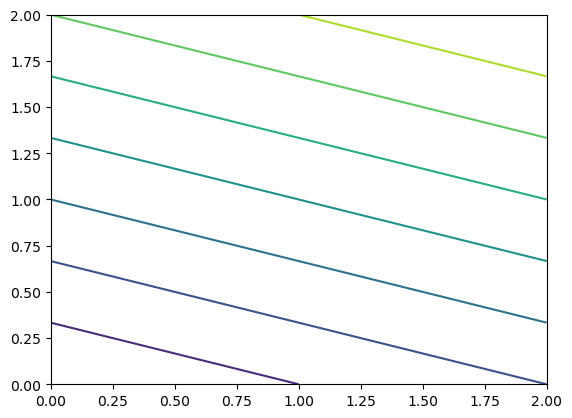

In [ ]:
import matplotlib.pyplot as plt

plt.contour(x_arr, y_arr, z)

### A more interesting example

`np.linspace(start, end, number of elements)` is a function like `np.arange()` for generating 1D arrays but instead of a fixed step size the function calculates the required step size to get the desired number of elements in the array.

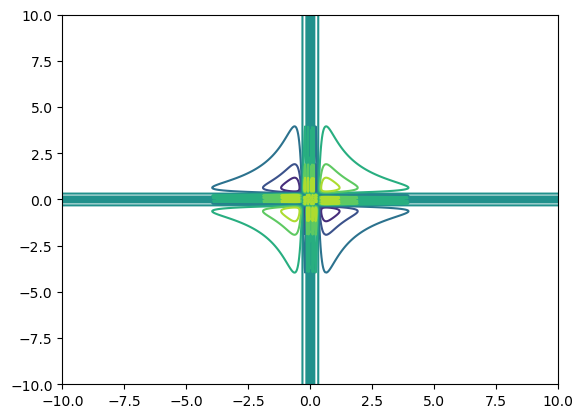

In [ ]:
x_range = np.linspace(-10, 10, 1000)
y_range = np.linspace(-10, 10, 1000)
x_arr, y_arr = np.meshgrid(x_range, y_range)
z = np.sin(1/x_arr)*np.sin(1/y_arr)
plt.contour(x_arr, y_arr, z)

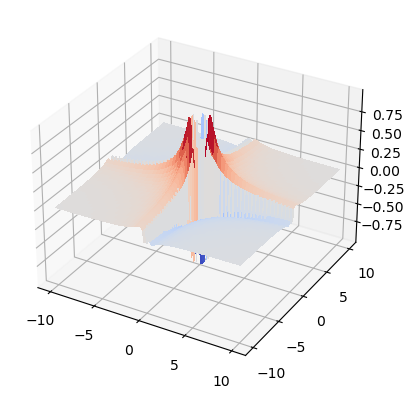

In [ ]:
from matplotlib import cm

# Can even do 3D plots!
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_arr, y_arr, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

## Answers to Quiz Questions

#### Quiz A:

1. How do you preallocate memory for a 3 dimensional array with 12 rows, 15 columns and a depth of 5?
- `np.reshape((15,12,5))`
- `np.reshape((11,14,4))`
- **ANSWER: `np.zeros((12,15,5))`**
- `np.zeros((11,14,4))`
- `np.stack([np.zeros(12,15),np.zeros(12,15),np.zeros(12,15)])`

2. Which of the following code chunks would define the below matrix (where we follow the row-column index order convention)?

$$
\begin{pmatrix}
1 & 3 & 7 \\
11 & 13 & 17 \\
\end{pmatrix}
$$

- `np.array([1,3,7,11,13,17])`
- **ANSWER: `np.array([[1,3,7],[11,13,17]])`**
- `np.array([[1,11],[3,13],[7,17]])`


3. Which function is used for generating an array based on a range of values?
- `np.zeros()`
- **ANSWER: `np.arange()`**
- `np.reshape()`

### Quiz B:

1. Which of the following shape tuples represents a 3D array:
- `(3,)`
- `(7,)`
- `(7,8)`
- `(3,8)`
- `(3,3)`
- **ANSWER: `(7,8,9)`**

2. How do you cast an array's type to a float:
- **ANSWER: `manual_arr.astype(float)`**
- `float(manual_arr)`

3. What is the expected output of the following code:
`np.stack([row_1,row_2]).shape`
>(`row_1` and `row_2` are defined in stacking examples above)
- **ANSWER: `(2,3)`**
- `(6,)`
- `(3,2)`

4. What is the expected output of the following code:
`np.array([1., 2.]).dtype`
- `int`
- `dtype('int64')`
- `str`
- **ANSWER: `dtype('float64')`**
- `float`

#### Quiz C:

1. Which of the following selects the top-right element of the 3x3 array:
    - `manual_arr[1][3]`      
    - `manual_arr[2][2]`
    - `manual_arr[0][0]`
    - `manual_arr[0][3]`
    - **ANSWER: `manual_arr[0][2]`**
    - `manual_arr[1][2]`

Suppose you are given the following array, in a variable `arr`:
$$
\begin{pmatrix}
1 & 3 & 7 \\
11 & 13 & 17 \\
19 & 23 & 29
\end{pmatrix}
$$

How would you:

2. select the row `[11,13,17]`?
    - `arr[2, 0]`
    - `arr[0, 1]`
    - **ANSWER: `arr[1, :]`**
    - `arr[:, 2]`
    - `arr[2, :]`

3. change all the numbers less than 10 to 10?
    - `arr.reshape((10,10))`
    - `np.where( arr > 10, 10, arr)`
    - **ANSWER: `np.where( arr < 10, 10, arr)`**
    - `np.if(arr > 10, 10, arr)`
    - `np.reshape( arr > 10, 10, arr)`
    - `np.reshape( arr < 10, 10, arr)`

4. replace the first column with 3s?
    - `arr[0] = 3` 
    - `arr[1, :] = [3, 3, 3]`
    - `arr[2] = [3, 3, 3]`
    - **ANSWER: `arr[:, 0] = 3`**
    - `arr[:, 1] = 3`
    - `arr[2, :] = 3`
    - `arr[:, 2] = 3`


5. select `[[1, 7], [19, 29]]` ?
    - `arr[:, 0]`
    - `arr[0, :]`
    - `arr[::2, 0]`
    - **ANSWER: `arr[::2, ::2]`**
    - `arr[0, ::2]`

### Quiz D

1. How would you multiply two matrices together? (remember a matrix uses special multiplcation)
    - `mat_1 * mat_2`
    - `mat_1.reshape((-1,)) * mat_2.reshape((-1,))`
    - **ANSWER: `mat_1 @ mat_2`**
    - `mat_1.sum() * mat_2.sum()`

2. What is vectorized code?
    - Code with a lot of software vulnerabilities, i.e. has many attack vectors
    - **ANSWER: Code that uses native NumPy functions over built in python, especially in place of loops and condtionals**
    - Code that uses large vectors for scientific computation
    - Code for the bio-informatics study of virology, i.e. studying transmission vectors

3. How would you sum a 2D matrix array column-wise?
    - `arr.sum()`
    - **ANSWER: `arr.sum(axis=0)`**
    - `arr.sum(axis=1)`

4. Assuming `arr` is a (3,3) array, which of the following will add `[1, 2, 3]` to each column:
    - `arr + np.arange(3)`
    - `arr + np.arange(1,4)`
    - `arr + np.arange(3).reshape((3,1))`
    - **ANSWER: `arr + np.arange(1,4).reshape((3,1))`**

### Quiz E

Given the definition of `a` above what will the following return, note **this is a 3D array**:

> Hint: if you are struggling, run some code in the empty cell above and use `.shape` to help you!

1. `a.sum(axis=0)`
    - `Error` of some kind
    - **ANSWER: The sum of columns, or slices defined by a[:, x, y], shape (4,2)**
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

2. `a.sum(axis=1)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - **ANSWER: The sum of rows, or slices defined by a[x, :, y], shape (3,2)**
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

3. `a.sum(axis=2)`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - **ANSWER: The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)**

4. `a.sum()`
    - `Error` of some kind
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - **ANSWER: The sum of all elements, shape (1,)**
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

5. `a.sum(axis=3)`
    - **ANSWER: `Error` of some kind**
    - The sum of columns, or slices defined by a[:, x, y], shape (4,2)
    - The sum of all elements, shape (1,)
    - The sum of rows, or slices defined by a[x, :, y], shape (3,2)
    - The sum across the depth of the array, or slices defined by a[x, y, :], shape (3,4)

## Answers to Challenges

- Why is there a bar in the image if we are looking at the original but we edited the compressed?

**ANSWER: We did not `copy()` the array so were working with a reference, or window into, the original image, so when we modified it we modified the underlying array.**

- Why is it not a solid bar as in the compressed image (can still see the footprint)?

**ANSWER: The reference defined by the compressed image array was every second column, so we only affected every second column of the original image even if we affected a continuous block in the compressed image.**